# **BACKGROUND**

FundFusion, a Wakanda-based bank, wants to extend its marketing efforts to existing and new customers. One of the marketing methods is to conduct telephone-based campaigns, also known as telemarketing. This method works by offering things to customers over the phone.

FundFusion currently lacks a clear product-selling approach when addressing new consumers. Based on the products supplied by FundFusion, each Account Manager has distinct KPI's for customer acquisition. These products include Savings, Deposits, Credit Cards, House Loans, Auto Loans, and Cash Loans.

As a result, potential customers will be approached multiple times per day by different Account Managers to be pitched different products. The upshot is that the rejection rate obtained is extremely high and is perceived as spam by potential consumers, resulting in number blocking.

# **PROBLEM STATEMENT**

Lack of appropriate strategies in offering product types that suit the segmentation of potential customers

# **BUSINESS OBJECTIVE**

Increasing new customers by offering the appropriate products based on the preferences of prospective customers who will be contacted


# **ANALYSIS OBJECTIVE**

Create a Clustering Model to establish product ownership based on customer demographics who are actively using FundFusion services, with a Silhouette Score greater than 0.7.

# **DATASET INFORMATION**

Some information is available from the existing dataset.

---

**1. GCIF**: Unique Customer Identifier\
**2. Area**: Customer Location (Jakarta, Bogor, Bandung, Surabaya, Jogja, Solo)\
**3. Jalur Pembukan**: Customer Touch Points when opening a product --> Branch, Telemarketing, Digital Applications, Internet Banking\
**4. Vintage**: Duration of being a customer (since opening an account)\
**5. Usia**: Customer's age\
**6. Jenis_Kelammin**: Male (1) & Female (0)\
**7. Status_Perkawinan**: Not Married (0), Married (1), Divorced (2), Widowed (3)\
**8. Jumlah_Anak**: Number of Customer's Children (numeric)\
**9. Pendidikan**: Latest Educational Status --> No Formal Education (0), Elementary School (1), Middle School (2), High School (3), Bachelor's Degree (4), Master's Degree (5), Doctoral Degree (6)\
**10. Produk_Tabungan**: Product Ownership Status (Yes/1, No/0)\
**11. Produk_Depostio**: Product Ownership Status (Yes/1, No/0)\
**12. Produk_Kartu_Kredit**: Product Ownership Status (Yes/1, No/0)\
**13. Produk_Kredit__Rumah**: Product Ownership Status (Yes/1, No/0)\
**14. Produk_Kredit_Kendaraan**: Product Ownership Status (Yes/1, No/0)\
**15. Produk_Kredit_Dana_Tunai**: Product Ownership Status (Yes/1, No/0)\
**16. Total_Kepemilikan_Produk**: Number of Products Owned (Sum of Products2)\
**17. Pendapatan_Tahunan:** Average Income in a Year\
**18. Total_Relationship_Balance:** Total Customer Assets in the Observation Month

# **EXPERIMENT**

Point of View:
1. Grouped based on demographics to look for product ownership patterns
2. Grouped based on product ownership to look for patterns based on demographics

# **IMPORT PACKAGE**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
pd.set_option('display.max_columns', None)

# **IMPORT DATASET**

In [3]:
path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(path_1)

In [4]:
data.dtypes

GCIF                           object
Area                           object
Jalur_Pembukaan                object
Vintage                        object
Usia                          float64
Jenis_Kelamin                  object
Status_Perkawinan              object
Jumlah_Anak                     int64
Pendidikan                     object
Produk_Tabungan                 int64
Produk_Deposito                 int64
Produk_Kartu_Kredit             int64
Produk_Kredit_Rumah             int64
Produk_Kredit_Kendaraan         int64
Produk_Kredit_Dana_Tunai        int64
Total_Kepemilikan_Produk        int64
Pendapatan_Tahunan              int64
Total_Relationship_Balance      int64
dtype: object

# **DATA UNDERSTANDING**

## Distribution of Customers Based on Location

In [5]:
data.groupby(('Area'))['Area'].count()

Area
Bandung     6917
Bogor       1191
Jakarta     7017
Jogja       3001
Solo        5001
Surabaya    5002
Name: Area, dtype: int64

In [6]:
data.groupby(('Area')).mean()

<ipython-input-6-9edb5b7418b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(('Area')).mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


## Distribution of Customers Based on Duration of Ownership

In [7]:
data.groupby('Vintage')['Vintage'].count()

Vintage
2 - 3 Tahun    13953
< 1 Tahun       9278
> 4 Tahun       4898
Name: Vintage, dtype: int64

In [8]:
data.groupby('Vintage').mean()

<ipython-input-8-ae475ab7a408>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Vintage').mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


## Distribution of Customers Based on Touch Point

In [9]:
data.groupby('Jalur_Pembukaan')['Jalur_Pembukaan'].count()

Jalur_Pembukaan
Aplikasi Digital     6216
Cabang               5856
Internet Banking     5795
Telemarketing       10262
Name: Jalur_Pembukaan, dtype: int64

In [10]:
data.groupby('Jalur_Pembukaan').mean()

<ipython-input-10-6f3989355d05>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Jalur_Pembukaan').mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


## Distribution of Customers Based on Marital Status

In [11]:
data.groupby('Status_Perkawinan')['Status_Perkawinan'].count()

Status_Perkawinan
Belum Menikah     8168
Cerai             4077
Janda/Duda        4045
Menikah          11839
Name: Status_Perkawinan, dtype: int64

In [12]:
data.groupby('Status_Perkawinan').mean()

<ipython-input-12-95184a6a69ad>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Status_Perkawinan').mean()


,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


# **DATA PREPARATION**

## Checking Duplicate and Missing Data

In [13]:
data.isnull().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [14]:
data = data.dropna()

In [15]:
data.isnull().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

In [16]:
data.duplicated().sum()

0

## Checking Outliers

In [17]:
data.count()

GCIF                          24084
Area                          24084
Jalur_Pembukaan               24084
Vintage                       24084
Usia                          24084
Jenis_Kelamin                 24084
Status_Perkawinan             24084
Jumlah_Anak                   24084
Pendidikan                    24084
Produk_Tabungan               24084
Produk_Deposito               24084
Produk_Kartu_Kredit           24084
Produk_Kredit_Rumah           24084
Produk_Kredit_Kendaraan       24084
Produk_Kredit_Dana_Tunai      24084
Total_Kepemilikan_Produk      24084
Pendapatan_Tahunan            24084
Total_Relationship_Balance    24084
dtype: int64

In [18]:
# Detect and resolve outliers (with Z-Score)
from scipy import stats
z_scores = stats.zscore(data[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])

# Delete data with Z-Score greater than 3
data = data[(z_scores < 3).all(axis=1)]

In [19]:
data.count()

GCIF                          23704
Area                          23704
Jalur_Pembukaan               23704
Vintage                       23704
Usia                          23704
Jenis_Kelamin                 23704
Status_Perkawinan             23704
Jumlah_Anak                   23704
Pendidikan                    23704
Produk_Tabungan               23704
Produk_Deposito               23704
Produk_Kartu_Kredit           23704
Produk_Kredit_Rumah           23704
Produk_Kredit_Kendaraan       23704
Produk_Kredit_Dana_Tunai      23704
Total_Kepemilikan_Produk      23704
Pendapatan_Tahunan            23704
Total_Relationship_Balance    23704
dtype: int64

## Filtering Data Telemarketing Only

In [20]:
data0 = data[data['Jalur_Pembukaan']=='Telemarketing']
data0

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28089,G19583,Bandung,Telemarketing,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
28090,G18081,Jakarta,Telemarketing,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
28092,G18530,Bandung,Telemarketing,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
28095,G03782,Jogja,Telemarketing,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


In [21]:
data0 = data0.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index(drop=True)
data0 = data0.reset_index()
data0

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


# **DATA TRANSFORMATION**

## Separation of Experiment Dataset

1. Experiment 0 --> Using all variables
2. Experiment 1 --> Using Demographics
3. Experiment 2 --> Using Finance-Related Variables

In [22]:
data1 = data0.iloc[:,1:8]
data1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [23]:
data2 = data0.iloc[:,8:17]
data2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


## Encoding for Data Category

In [24]:
data1 = pd.get_dummies(data1, columns=['Area','Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan','Vintage'])
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,30.0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
2,29.0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,49.0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,21.0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0
8649,58.0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0
8650,42.0,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0
8651,44.0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0


## Standardization of Numerical Data

In [25]:
predname_num = data2.columns
predname_num

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [26]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num = pd.DataFrame(pt.fit_transform(data2))
X_num.head()

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


In [27]:
X_num.columns = predname_num
X_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


# **CHECK FOR CORRELATIONS**

In [28]:
corrtest1 = data1.corr().abs()
corrtest2 = X_num.corr().abs()

## Drop Redundant Values In Matrix

In [29]:
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool))

<ipython-input-29-482d27426e7a>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(np.bool))
<ipython-input-29-482d27426e7a>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(np.bool))


## Look for Correlated Values Greater Than 0.7

In [30]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]

## Drop Columns that Correlate Greater Than 0.7

In [31]:
data1 = data1.drop(to_drop, axis=1)
data2 = data2.drop(to_drop1, axis=1)

In [32]:
data1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
1,30.0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0
2,29.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0
3,49.0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0
4,21.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
8649,58.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
8650,42.0,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0
8651,44.0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0


In [33]:
X_num

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# **COMBINE DATASET**

In [34]:
data_combined = pd.concat([data1, X_num], axis=1, join='inner')
data_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30.0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49.0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21.0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58.0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42.0,3,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44.0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# **MODELING & EVALUATION**

Two algorithms will be used to construct the model:
1. K-Means
2. K-Medoids

checking using a Silhouette Score

## K-Means

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Experiment 0

In [36]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -3 : 0.4337636155000406


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -4 : 0.41093123023700157


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -5 : 0.32999985928593295


Experiment 1

In [37]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -3 : 0.5001832110224678


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -4 : 0.4618500330906909


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -5 : 0.4114962944410271


Experiment 2

In [38]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -3 : 0.18408368480533616


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -4 : 0.19019713858843065


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score (K-Means) -5 : 0.19917934939547233


## K-Medoids

In [39]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.6 MB/s eta 0:00:00


In [40]:
from sklearn_extra.cluster import KMedoids

Experiment 0

In [41]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_combined)
    silhouette_avg = silhouette_score(data_combined, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.43369790762336996
Silhouette Score (K-Medoids) -4 : 0.33519427927551565
Silhouette Score (K-Medoids) -5 : 0.3211940252247904


Experiment 1

In [42]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data1)
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp1_'+str(n_clusters)] = cluster_labels

/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -3 : 0.0050675633465087746


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -4 : 0.4657942038387023


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


Silhouette Score (K-Medoids) -5 : 0.4178025801646672


Experiment 2

In [43]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(X_num)
    silhouette_avg = silhouette_score(X_num, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    data0['Clustering_KMedoids_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.11659038864364947
Silhouette Score (K-Medoids) -4 : 0.09680611087667028
Silhouette Score (K-Medoids) -5 : 0.08883545658405254


# **RESULT ANALYSIS**

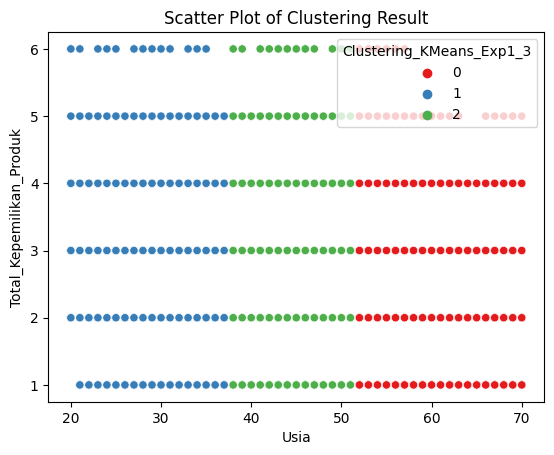

In [44]:
    sns.scatterplot(data=data0, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
    plt.title('Scatter Plot of Clustering Result')
    plt.show()

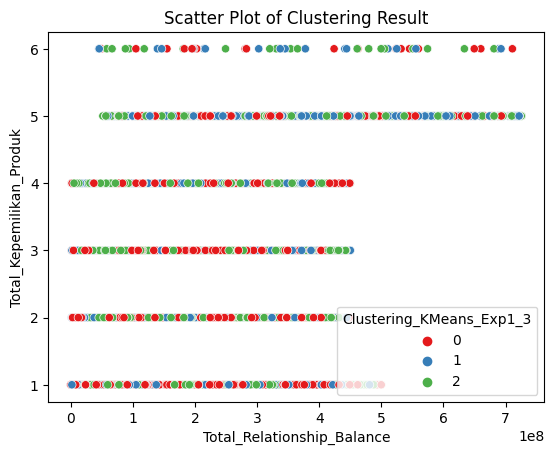

In [45]:
    sns.scatterplot(data=data0, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
    plt.title('Scatter Plot of Clustering Result')
    plt.show()

In [46]:
cluster_means = data0[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
cluster_means

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Total_Relationship_Balance
Clustering_KMeans_Exp1_3,,,,,,,,,,
0,58.063617,1.474844,0.688565,0.600416,0.342204,0.612474,0.170062,0.541788,2.955509,2.379434e+08
1,29.503177,1.191528,1.000000,0.592436,0.308018,0.586989,0.157337,0.599092,3.243873,2.439352e+08
2,44.974856,1.295617,0.988107,0.603126,0.333333,0.556575,0.154264,0.522936,3.158342,2.384758e+08


## Group 0

In [47]:
data0[data0['Clustering_KMeans_Exp1_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2405.000000,2405.000000,2405.000000,2.405000e+03
mean,58.063617,1.474844,2.955509,2.379434e+08
std,5.298230,1.478314,1.053131,1.382820e+08
min,52.000000,0.000000,1.000000,1.028000e+03
25%,54.000000,0.000000,2.000000,1.245667e+08
50%,57.000000,1.000000,3.000000,2.322131e+08
75%,61.000000,3.000000,4.000000,3.491686e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [48]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Area'].value_counts(normalize=True)

Jakarta     0.482328
Bandung     0.163825
Surabaya    0.125572
Solo        0.125572
Jogja       0.074012
Bogor       0.028690
Name: Area, dtype: float64

In [49]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Vintage'].value_counts(normalize=True)

2 - 3 Tahun    0.486486
< 1 Tahun      0.310603
> 4 Tahun      0.202911
Name: Vintage, dtype: float64

In [50]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Pendidikan'].value_counts(normalize=True)

Sarjana                 0.265281
SD                      0.197089
SMA                     0.179626
Tidak Sekolah Formal    0.103950
Doktor                  0.086486
SMP                     0.083992
Magister                0.083576
Name: Pendidikan, dtype: float64

In [51]:
data0[data0['Clustering_KMeans_Exp1_3']==0]['Jenis_Kelamin'].value_counts(normalize=True)

Laki-laki    0.672765
Perempuan    0.327235
Name: Jenis_Kelamin, dtype: float64

## Group 1

In [52]:
data0[data0['Clustering_KMeans_Exp1_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [53]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: Area, dtype: float64

In [54]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

2 - 3 Tahun    0.501967
< 1 Tahun      0.293192
> 4 Tahun      0.204841
Name: Vintage, dtype: float64

In [55]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

Sarjana                 0.274130
SMA                     0.192436
SD                      0.180333
Doktor                  0.097731
Magister                0.087443
SMP                     0.084720
Tidak Sekolah Formal    0.083207
Name: Pendidikan, dtype: float64

In [56]:
data0[data0['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

Laki-laki    0.640847
Perempuan    0.359153
Name: Jenis_Kelamin, dtype: float64

## Group 2

In [57]:
data0[data0['Clustering_KMeans_Exp1_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2943.000000,2943.000000,2943.000000,2.943000e+03
mean,44.974856,1.295617,3.158342,2.384758e+08
std,3.976996,1.474092,1.038061,1.439379e+08
min,38.000000,0.000000,1.000000,1.587496e+06
25%,42.000000,0.000000,2.000000,1.178243e+08
50%,45.000000,1.000000,3.000000,2.325173e+08
75%,48.000000,3.000000,4.000000,3.468223e+08
max,51.000000,4.000000,6.000000,7.259942e+08


In [58]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Area'].value_counts(normalize=True)

Jakarta     0.481821
Bandung     0.163099
Surabaya    0.132518
Solo        0.113829
Jogja       0.081210
Bogor       0.027523
Name: Area, dtype: float64

In [59]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Vintage'].value_counts(normalize=True)

2 - 3 Tahun    0.505607
< 1 Tahun      0.295957
> 4 Tahun      0.198437
Name: Vintage, dtype: float64

In [60]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Pendidikan'].value_counts(normalize=True)

Sarjana                 0.269113
SD                      0.185865
SMA                     0.180428
SMP                     0.096840
Doktor                  0.092083
Magister                0.089365
Tidak Sekolah Formal    0.086306
Name: Pendidikan, dtype: float64

In [61]:
data0[data0['Clustering_KMeans_Exp1_3']==2]['Jenis_Kelamin'].value_counts(normalize=True)

Laki-laki    0.675841
Perempuan    0.324159
Name: Jenis_Kelamin, dtype: float64

# **CONCLUSION**

All models have an average Silhouette Score of less than 0.5, As a result, the intended goals have not yet been met in this model development cycle (Silhouette Score is greater than 0.7).

Future development solutions that can be implemented include:
1. Adding new variables
2. Break down some variables, such as Total_Relationship_Balance, which can be broken down to balance per product.